## Import Packages and Set Path

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
cd drive/MyDrive/Master\ at\ KU\ Lueven/2nd\ Semester/Big\ Data\ Platforms\ &\ Technologies/Big\ Data\ Assignments/Assignment\ 1

/content/drive/MyDrive/Master at KU Lueven/2nd Semester/Big Data Platforms & Technologies/Big Data Assignments/Assignment 1


## Load Data

In [ ]:
train = pd.read_csv('data/original/train.csv')
test = pd.read_csv('data/original/test.csv')
train.head()

,Gender,Age,Connect_Date,L_O_S,Dropped_Calls,tariff,Handset,Peak_calls_Sum,Peak_mins_Sum,OffPeak_calls_Sum,...,Tariff_OK,average cost min,Peak ratio,OffPeak ratio,Weekend ratio,Nat-InterNat Ratio,high Dropped calls,No Usage,target,id
0,F,50.0,20/05/98,29.200000,2.0,Play 100,BS210,62.0,153.000000,185.0,...,OK,0.150531,0.246536,0.706735,0.046729,0.203034,F,F,0,K262360
1,M,25.0,16/12/96,46.533333,1.0,CAT 100,ASAD90,146.0,718.800000,98.0,...,OK,0.188988,0.780710,0.178886,0.040404,0.273249,F,F,1,K170160
2,F,46.0,27/08/97,38.066667,1.0,CAT 50,WC95,160.0,322.800000,7.0,...,OK,0.239300,0.722633,0.277367,0.000000,0.205025,F,F,0,K331610
3,F,59.0,13/07/98,27.400000,1.0,CAT 50,BS110,84.0,317.400001,57.0,...,OK,0.221467,0.662492,0.337508,0.000000,0.050090,F,F,0,K332460
4,F,25.0,08/01/99,21.433333,1.0,Play 300,WC95,14.0,309.600000,326.0,...,OK,0.107509,0.321896,0.663132,0.014972,0.090509,F,F,0,K394220


## Data Description

Text(0.5, 1.0, 'Number of Different Target Values')

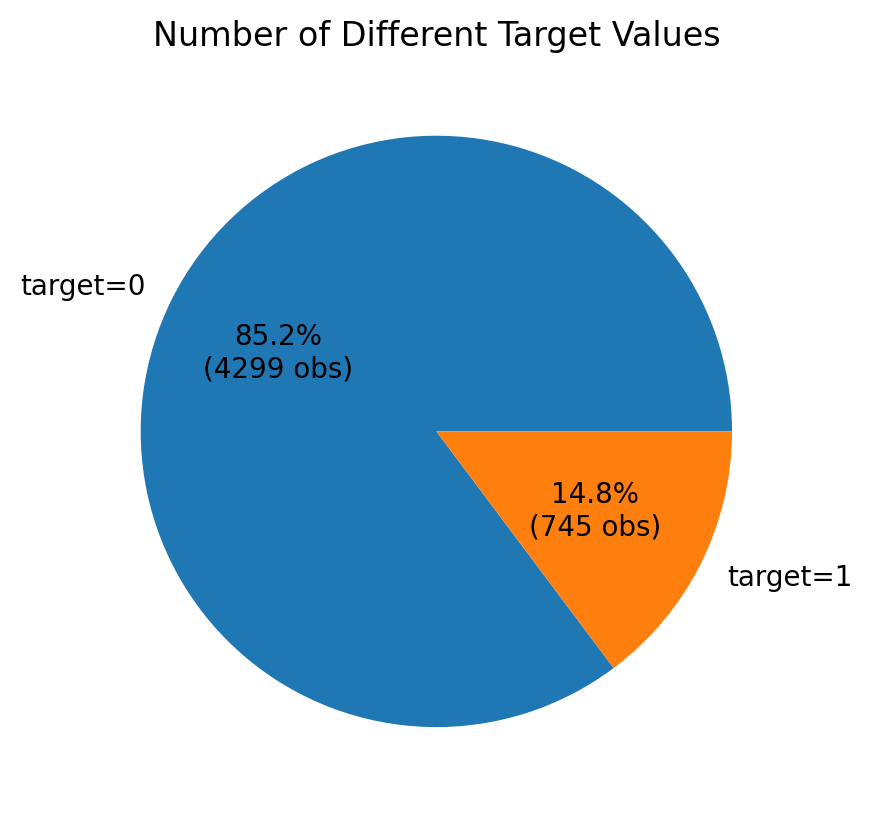

In [ ]:
classes = train.target.value_counts()

plt.figure(dpi=200)
plt.pie(
    classes,
    labels=['target=0', 'target=1'],
    autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*train.shape[0])+1} obs)",
    )
plt.title('Number of Different Target Values')

## Missing Value

### Training Data
- Index 1736, 3237, 3836, 4301 have missing value at `call_cost_per_min`, `Usage_Band`, and `Dropped_calls_ratio`


In [ ]:
train.isnull().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       4
Usage_Band                4
Mins_charge               0
call_cost_per_min         4
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [ ]:
train[train.call_cost_per_min.isnull()].index

Index([1736, 3237, 3836, 4301], dtype='int64')

In [ ]:
train[train.Usage_Band.isnull()].index

Index([1736, 3237, 3836, 4301], dtype='int64')

In [ ]:
train[train.Dropped_calls_ratio.isnull()].index

Index([1736, 3237, 3836, 4301], dtype='int64')

### Testing Data
- Index 647 has missing value at `call_cost_per_min`, `Usage_Band`, and `Dropped_calls_ratio`, the same fields as the training data

In [ ]:
test.isnull().sum()

Gender                    0
Age                       0
Connect_Date              0
L_O_S                     0
Dropped_Calls             0
tariff                    0
Handset                   0
Peak_calls_Sum            0
Peak_mins_Sum             0
OffPeak_calls_Sum         0
OffPeak_mins_Sum          0
Weekend_calls_Sum         0
Weekend_mins_Sum          0
International_mins_Sum    0
Nat_call_cost_Sum         0
AvePeak                   0
AveOffPeak                0
AveWeekend                0
National_calls            0
National mins             0
AveNational               0
All_calls_mins            0
Dropped_calls_ratio       1
Usage_Band                1
Mins_charge               0
call_cost_per_min         1
actual call cost          0
Total_call_cost           0
Total_Cost                0
Tariff_OK                 0
average cost min          0
Peak ratio                0
OffPeak ratio             0
Weekend ratio             0
Nat-InterNat Ratio        0
high Dropped calls  

In [ ]:
print(test[test.call_cost_per_min.isnull()].index)

Index([1389], dtype='int64')


In [ ]:
print(test[test.Usage_Band.isnull()].index)

Index([1389], dtype='int64')


In [ ]:
print(test[test.Dropped_calls_ratio.isnull()].index)

Index([1389], dtype='int64')


## Imputation for Missing Values

In [ ]:
imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imputer_numerical.fit(train[['call_cost_per_min', 'Dropped_calls_ratio']])
train[['call_cost_per_min', 'Dropped_calls_ratio']] = imputer_numerical.transform(train[['call_cost_per_min', 'Dropped_calls_ratio']])
test[['call_cost_per_min', 'Dropped_calls_ratio']] = imputer_numerical.transform(test[['call_cost_per_min', 'Dropped_calls_ratio']])

imputer_categorical.fit(train[['Usage_Band']])
train[['Usage_Band']] = imputer_categorical.transform(train[['Usage_Band']])
test[['Usage_Band']] = imputer_categorical.transform(test[['Usage_Band']])

## Test-Validation Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
sub_train_1, validation_1 = train_test_split(train.query('target==1'), test_size=0.2, random_state=21)
sub_train_0, validation_0 = train_test_split(train.query('target==0'), test_size=0.2, random_state=21)

sub_train = pd.concat([sub_train_1, sub_train_0])
validation = pd.concat([validation_1, validation_0])

In [ ]:
sub_train.to_csv('data/processed/train.csv', index=False)
validation.to_csv('data/processed/validation.csv', index=False)
test.to_csv('data/processed/test.csv', index=False)